In [2]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from collections import Counter

In [3]:
import montecarlo
from montecarlo import Die, Game, Analyzer

### Scenario 1

In [4]:
# Task 1
faircoin = np.array(['H','T'])
faircoin = Die(faircoin)

unfaircoin = np.array(['H','T'])
unfaircoin = Die(unfaircoin)
unfaircoin.change_weight('H', 5)

In [5]:
unfaircoin.die_state()

,weights
H,5
T,1


In [6]:
faircoin.die_state()

,weights
H,1
T,1


In [7]:
# Task 2
fairgame = Game([faircoin, faircoin])
fairgame.play(1000)

In [8]:
# Task 3
unfairgame = Game([unfaircoin, unfaircoin, faircoin])
unfairgame.play(1000)

In [9]:
feck = unfairgame.show_results()
row_counts = feck.groupby(feck.columns.tolist()).size().reset_index(name='count')
row_counts

,die_1,die_2,die_3,count
0,H,H,H,318
1,H,H,T,355
2,H,T,H,74
3,H,T,T,77
4,T,H,H,90
5,T,H,T,59
6,T,T,H,10
7,T,T,T,17


In [10]:
# Task 4
fairanalyzer = Analyzer(fairgame)
fairanalyzer.jackpot()

483

In [11]:
unfairanalyzer = Analyzer(unfairgame)
unfairanalyzer.jackpot()

335

In [12]:
# Task 5
fairanalyzer.jackpot()/1000

0.483

In [13]:
unfairanalyzer.jackpot()/1000

0.335

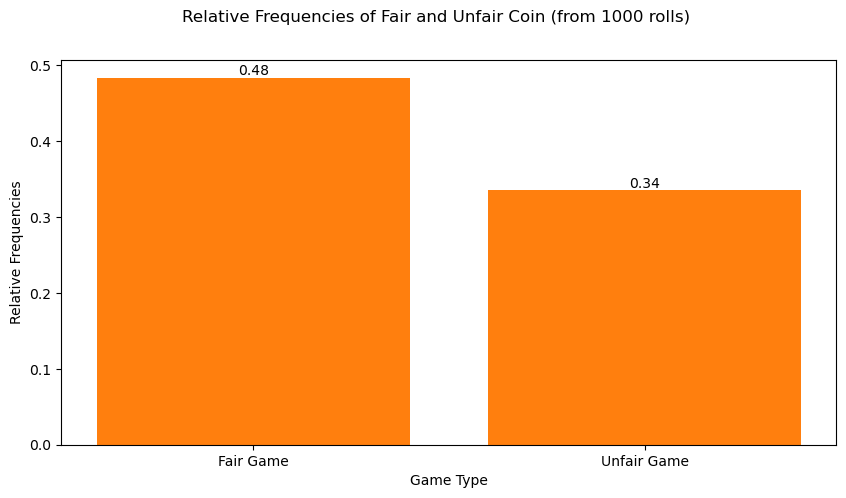

In [14]:
# Task 6
data = {'Method': ['Fair Game', 'Unfair Game'],
        'Relative_Frequencies': [fairanalyzer.jackpot()/1000, unfairanalyzer.jackpot()/1000]}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 5))
plt.bar(df.Method, df.Relative_Frequencies)
plt.ylabel('Relative Frequencies')
plt.xlabel('Game Type')
plt.suptitle('Relative Frequencies of Fair and Unfair Coin (from 1000 rolls)', fontsize='large')
for bar in plt.bar(df.Method, df.Relative_Frequencies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')


### Scenario 2

In [15]:
# Task 1
die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
die3 = Die(np.array([1, 2, 3, 4, 5, 6]))

In [16]:
# Task 2
die1.change_weight(6,5)

In [17]:
# Task 3
die2.change_weight(1,5)

In [18]:
# Task 4
fairgame = Game([die3, die3, die3, die3, die3])
fairgame.play(10000)

In [19]:
# Task 5
unfairgame = Game([die1, die2, die3, die3, die3])
unfairgame.play(10000)

In [20]:
# Task 6
fairanalyzer = Analyzer(fairgame)
fairanalyzer.jackpot()/10000

0.0005

In [21]:
unfairanalyzer = Analyzer(unfairgame)
unfairanalyzer.jackpot()/10000

0.0007

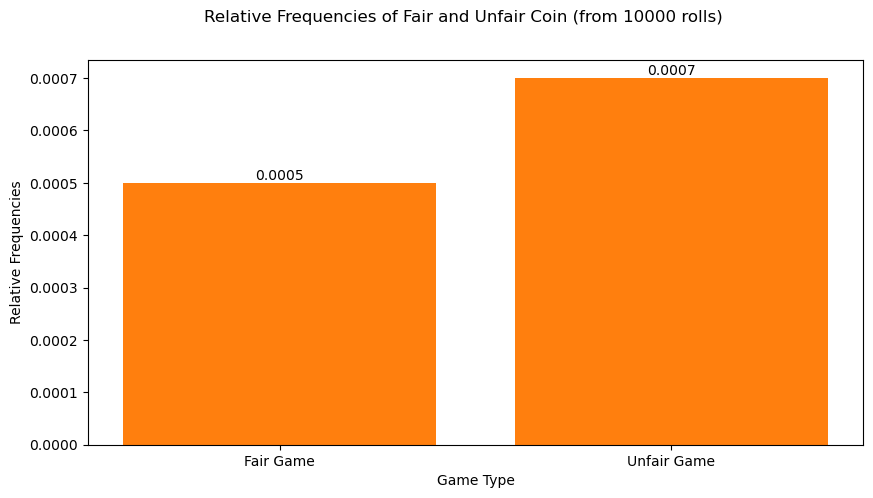

In [22]:
# Task 6
data = {'Method': ['Fair Game', 'Unfair Game'],
        'Relative_Frequencies': [fairanalyzer.jackpot()/10000, unfairanalyzer.jackpot()/10000]}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 5))
plt.bar(df.Method, df.Relative_Frequencies)
plt.ylabel('Relative Frequencies')
plt.xlabel('Game Type')
plt.suptitle('Relative Frequencies of Fair and Unfair Coin (from 10000 rolls)', fontsize='large')
for bar in plt.bar(df.Method, df.Relative_Frequencies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, va='bottom', ha='center')


### Scenario 3

In [23]:
letters = pd.read_csv('english_letters.txt', delimiter = ' ', header=None)
#letters = letters.set_index(0)
letters

,0,1
0,E,529117365
1,T,390965105
2,A,374061888
3,O,326627740
4,I,320410057
5,N,313720540
6,S,294300210
7,R,277000841
8,H,216768975
9,L,183996130


In [24]:
alphabet = Die(np.array(letters[0]))

In [25]:
# for i, face in enumerate(die.die_state().index):
#     weight = letters.loc[letters[0] == face, 1].values[0]
#     print(weight)
#     die.change_weight(face, weight)

In [26]:
# for x in list(alphabet.die_state().index):
#     alphabet.change_weight(x, letters.loc[x])

In [27]:
# for i, face in enumerate(alphabet.die_state().index):
#     alphabet.change_weight(face, letters.loc[i, 1])

In [28]:
for thisface in list(alphabet.die_state().index):
    print(thisface)
    thisweight = letters.loc[letters[0] == thisface, 1].values[0]
    print(thisweight)
    alphabet.change_weight(thisface, thisweight)

E
529117365
T
390965105
A
374061888
O
326627740
I
320410057
N
313720540
S
294300210
R
277000841
H
216768975
L
183996130
D
169330528
C
138416451
U
117295780
M
110504544
F
95422055
G
91258980
P
90376747
W
79843664
Y
75294515
B
70195826
V
46337161
K
35373464
J
9613410
X
8369915
Z
4975847
Q
4550166


In [29]:
faces = list(alphabet.die_state().index)

# Initialize index for while loop
i = 0

while i < len(faces):
    thisface = faces[i]
    
    # Find the corresponding weight for thisface
    thisweight = letters.loc[letters[0] == thisface, 1].values[0]
    
    # Update the weight in alphabet
    alphabet.change_weight(thisface, thisweight)
    
    # Increment the index for the next iteration
    i += 1

In [30]:
alphabet.change_weight('E', 529117365)
alphabet.change_weight('T', 390965105)
alphabet.change_weight('A', 374061888)
alphabet.change_weight('O', 326627740)
alphabet.change_weight('I', 320410057)
alphabet.change_weight('N', 313720540)
alphabet.change_weight('S', 294300210)
alphabet.change_weight('R', 277000841)
alphabet.change_weight('H', 216768975)
alphabet.change_weight('L', 183996130)
alphabet.change_weight('D', 169330528)
alphabet.change_weight('C', 138416451)
alphabet.change_weight('U', 117295780)
alphabet.change_weight('M', 110504544)
alphabet.change_weight('F', 95422055)
alphabet.change_weight('G', 91258980)
alphabet.change_weight('P', 90376747)
alphabet.change_weight('W', 79843664)
alphabet.change_weight('Y', 75294515)
alphabet.change_weight('B', 70195826)
alphabet.change_weight('V', 46337161)
alphabet.change_weight('K', 35373464)
alphabet.change_weight('J', 9613410)
alphabet.change_weight('X', 8369915)
alphabet.change_weight('Z', 4975847)
alphabet.change_weight('Q', 4550166)

In [31]:
alphabet.die_state()

,weights
E,529117365
T,390965105
A,374061888
O,326627740
I,320410057
N,313720540
S,294300210
R,277000841
H,216768975
L,183996130


In [43]:
# Task 2
game4 = Game([alphabet,alphabet,alphabet,alphabet])
game4.play(1000)

In [44]:
# Task 3
scrabble = pd.read_csv('scrabble_words.txt', header=None)
scrabble.head(10)

,0
0,AA
1,AAH
2,AAHED
3,AAHING
4,AAHS
5,AAL
6,AALII
7,AALIIS
8,AALS
9,AARDVARK


In [45]:
game4analyzer = Analyzer(game4)
game4analyzer.permutation_count()

,,,,Count
F,U,A,N,1
R,D,W,M,1
S,I,T,T,1
N,E,L,O,1
S,F,E,H,1
...,...,...,...,...
O,C,D,T,1
E,R,I,E,1
O,T,D,E,1
E,I,S,E,1


In [46]:
len(game4analyzer.permutation_count().index.map("".join).intersection(scrabble[0]))

50

In [47]:
# Task 4
game5 = Game([alphabet,alphabet,alphabet,alphabet,alphabet])
game5.play(1000)
game5analyzer = Analyzer(game5)
game5analyzer.permutation_count()

,,,,,Count
F,A,H,H,N,1
D,T,V,O,N,1
G,E,E,S,O,1
R,I,H,I,L,1
M,N,B,D,G,1
...,...,...,...,...,...
U,T,D,A,E,1
T,B,L,I,Y,1
M,E,T,H,U,1
H,O,S,E,S,1


In [48]:
len(game5analyzer.permutation_count().index.map("".join).intersection(scrabble[0]))

11

The permutations of the game with 4 sets of the alphabet produces more words compared to the game with 5 sets of the alphabet.